# Project : Car Price Prediction Using ANN Model

### Objective:
The objective of this project is to build a machine learning model that predicts the **selling price** of a car based on various features such as the car's name, manufacturing year, current price, kilometers driven, fuel type, seller type, transmission type, and ownership history. This model will help potential sellers or buyers estimate a car’s resale value more accurately.

### Updated Data Description:
1. **Car_Name**: The name or model of the car.
   - Data Type: `object` (Categorical)
   - Example: "Maruti Swift"

2. **Year**: The manufacturing year of the car. This can be used to derive the car's age.
   - Data Type: `int64`
   - Example: 2015

3. **Selling_Price**: The price at which the car was sold (in lakhs of Indian Rupees). This is the target variable for prediction.
   - Data Type: `float64`
   - Example: 4.5 (lakhs INR)

4. **Present_Price**: The current market price of the car (in lakhs of Indian Rupees). It reflects the car's present value based on its condition and market demand.
   - Data Type: `float64`
   - Example: 6.7 (lakhs INR)

5. **Kms_Driven**: The total kilometers the car has been driven. It indicates how much the car has been used, which is an important factor in determining the car's value.
   - Data Type: `int64`
   - Example: 40000 (km)

6. **Fuel_Type**: The type of fuel used by the car.
   - Data Type: `object` (Categorical)
   - Possible Values:
     - `Petrol`
     - `Diesel`
     - `CNG`

7. **Seller_Type**: The type of seller, indicating whether the car is being sold by a dealer or an individual.
   - Data Type: `object` (Categorical)
   - Possible Values:
     - `Dealer`
     - `Individual`

8. **Transmission**: The transmission type of the car.
   - Data Type: `object` (Categorical)
   - Possible Values:
     - `Manual`
     - `Automatic`

9. **Owner**: The number of previous owners of the car. This feature indicates how many people have owned the car before the current owner.
   - Data and feature selection to improve model performance.

# EDA

In [79]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load dataset
df = pd.read_csv("car data.csv")

In [3]:
df # Displaying the dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Feature Engineering

Create a new feature "Age" by using the Year of purchase.

In [5]:
df["age"] = df["Year"].apply(lambda x: 2024 - x) 

In [6]:
df.drop("Year",axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   age            301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.drop("Car_Name",axis=1,inplace=True)

In [9]:
df.duplicated().sum()

2

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,age
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508,0.043478,10.384615
std,4.984240,8.567887,39015.170352,0.248720,2.896868
min,0.100000,0.320000,500.000000,0.000000,6.000000
25%,0.850000,1.200000,15000.000000,0.000000,8.000000
50%,3.510000,6.100000,32000.000000,0.000000,10.000000
75%,6.000000,9.840000,48883.500000,0.000000,12.000000
max,35.000000,92.600000,500000.000000,3.000000,21.000000


In [13]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
df = df[df["Fuel_Type"]!="CNG"]

In [15]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [16]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     58
Name: Fuel_Type, dtype: int64

In [17]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,age
Selling_Price,1.000000,0.876533,0.028919,-0.088269,-0.234283
Present_Price,0.876533,1.000000,0.205261,0.009794,0.053135
Kms_Driven,0.028919,0.205261,1.000000,0.089570,0.525661
Owner,-0.088269,0.009794,0.089570,1.000000,0.182228
age,-0.234283,0.053135,0.525661,0.182228,1.000000


In [18]:
df = pd.get_dummies(df,drop_first=True,dtype="int64")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           297 non-null    float64
 1   Present_Price           297 non-null    float64
 2   Kms_Driven              297 non-null    int64  
 3   Owner                   297 non-null    int64  
 4   age                     297 non-null    int64  
 5   Fuel_Type_Petrol        297 non-null    int64  
 6   Seller_Type_Individual  297 non-null    int64  
 7   Transmission_Manual     297 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 20.9 KB


In [20]:
X = df.drop("Selling_Price",axis=1)
Y = df.Selling_Price

In [21]:
# RFE Method
model = LinearRegression()
rfe = RFE(model)
fit  = rfe.fit(X,Y)

In [22]:
fit.n_features_

3

In [23]:
fit.ranking_

array([4, 5, 3, 2, 1, 1, 1])

In [24]:
fit.support_

array([False, False, False, False,  True,  True,  True])

In [25]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'age', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [26]:
model = DecisionTreeRegressor()
model.fit(X,Y)

DecisionTreeRegressor()

In [27]:
(model.feature_importances_)

array([8.89515018e-01, 7.44146835e-03, 1.21494533e-04, 9.53479843e-02,
       7.00916269e-03, 2.21483482e-04, 3.43388861e-04])

In [28]:
import ppscore as pps

In [29]:
pp_score = pps.matrix(df)

In [30]:
pp_score = pp_score[["x","y","ppscore"]]

In [31]:
pp_score = pp_score[pp_score["y"]=="Selling_Price"]

In [32]:
pp_score.sort_values(by="ppscore",ascending=False)

,x,y,ppscore
0,Selling_Price,Selling_Price,1.000000
8,Present_Price,Selling_Price,0.555254
48,Seller_Type_Individual,Selling_Price,0.285163
40,Fuel_Type_Petrol,Selling_Price,0.082623
16,Kms_Driven,Selling_Price,0.000000
24,Owner,Selling_Price,0.000000
32,age,Selling_Price,0.000000
56,Transmission_Manual,Selling_Price,0.000000


In [33]:
X = df[["Present_Price","Seller_Type_Individual","Fuel_Type_Petrol","age"]]

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 300
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Present_Price           297 non-null    float64
 1   Seller_Type_Individual  297 non-null    int64  
 2   Fuel_Type_Petrol        297 non-null    int64  
 3   age                     297 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 11.6 KB


In [35]:
Y = df.Selling_Price

In [36]:
cleaned_data = pd.concat([X,Y],axis=1)

In [37]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 300
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Present_Price           297 non-null    float64
 1   Seller_Type_Individual  297 non-null    int64  
 2   Fuel_Type_Petrol        297 non-null    int64  
 3   age                     297 non-null    int64  
 4   Selling_Price           297 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 13.9 KB


## Visualization

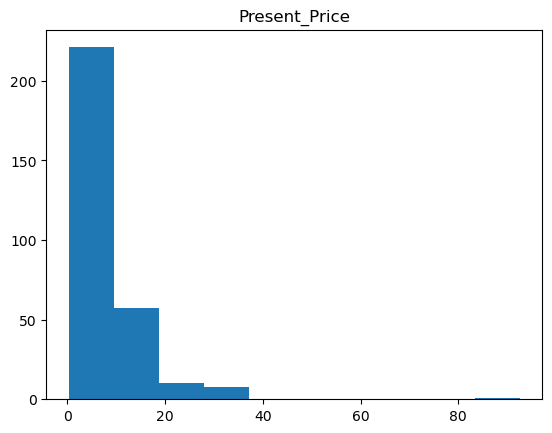

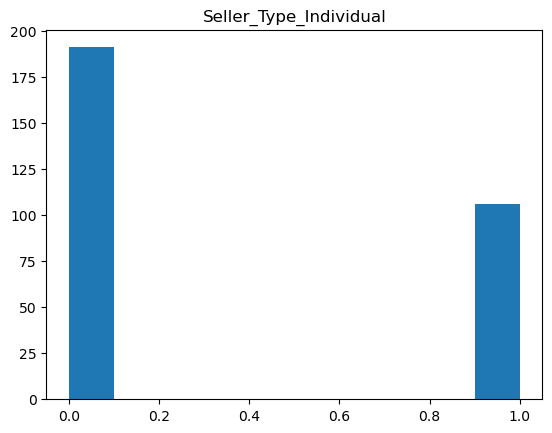

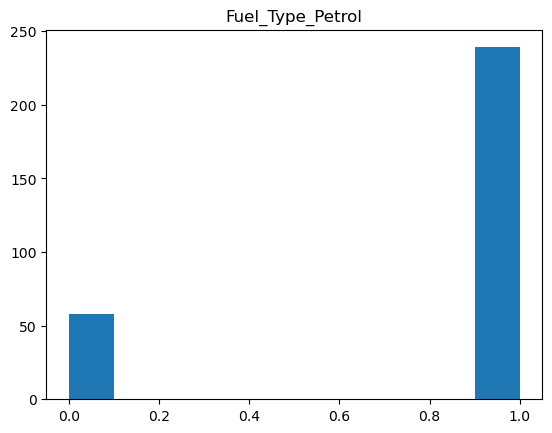

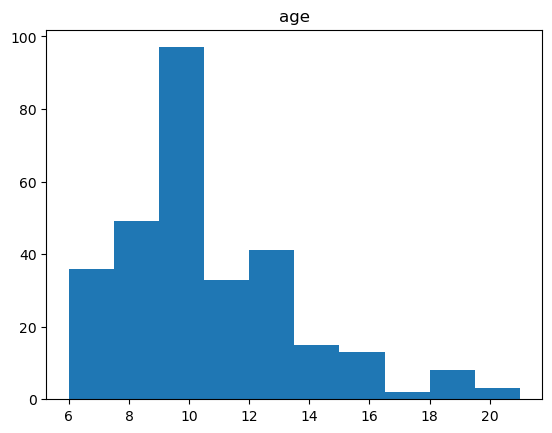

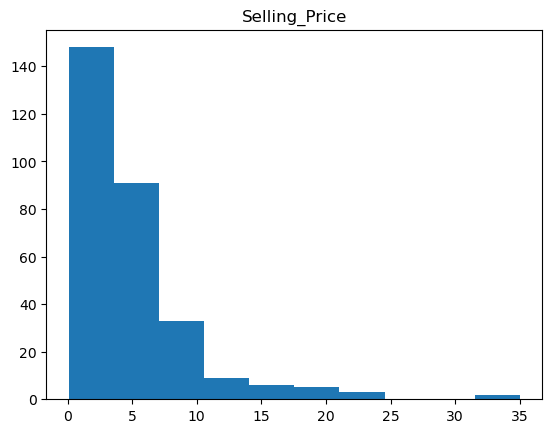

In [38]:
for column in cleaned_data.columns:
    plt.hist(x=cleaned_data[column])
    plt.title(column)
    plt.show()

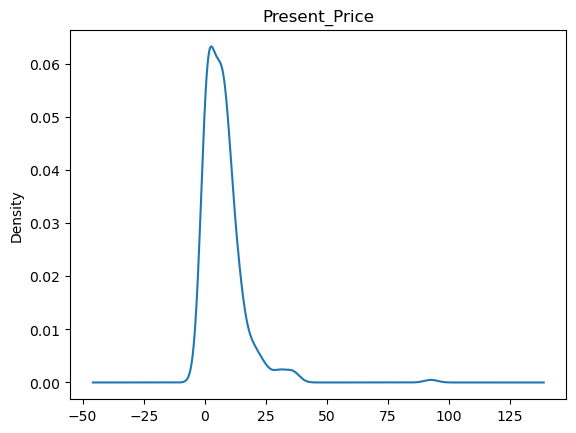

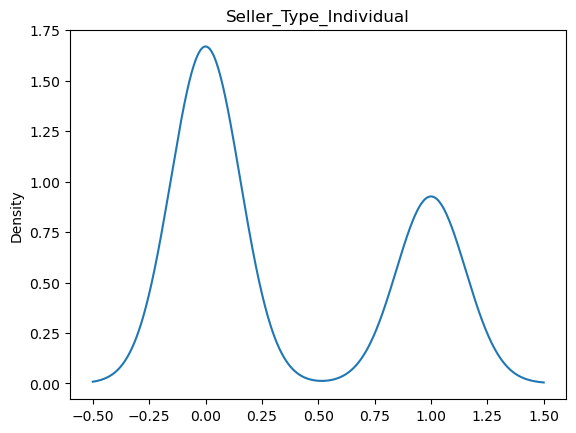

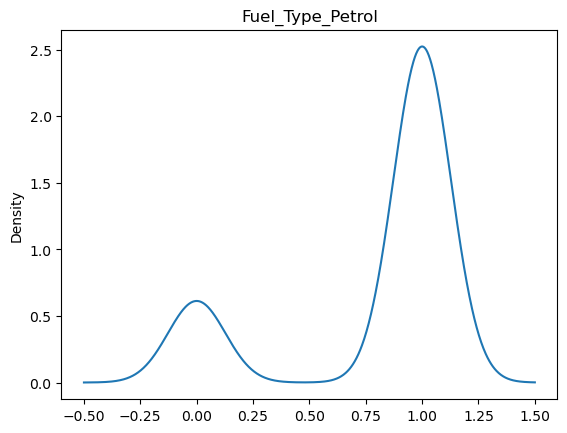

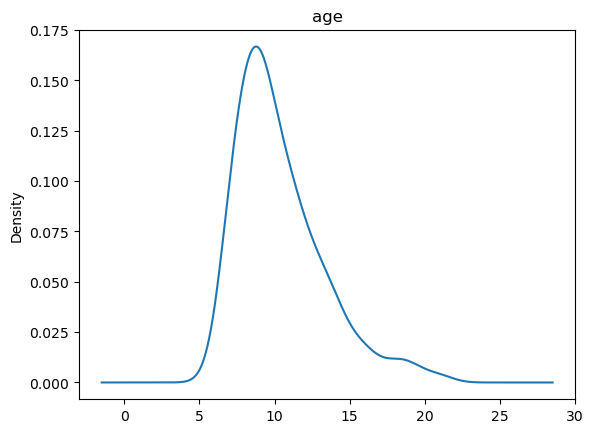

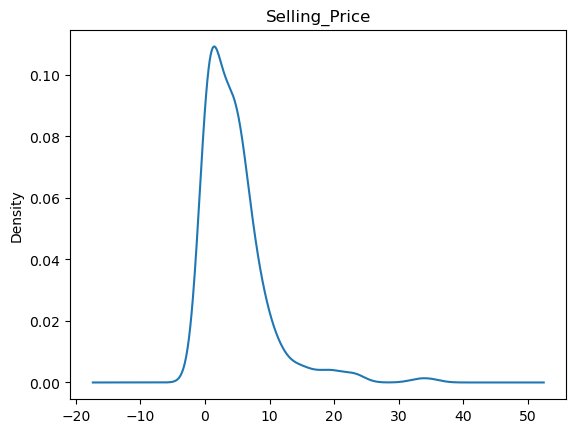

In [39]:
for column in cleaned_data.columns:
    cleaned_data[column].plot(kind="kde")
    plt.title(column)
    plt.show()

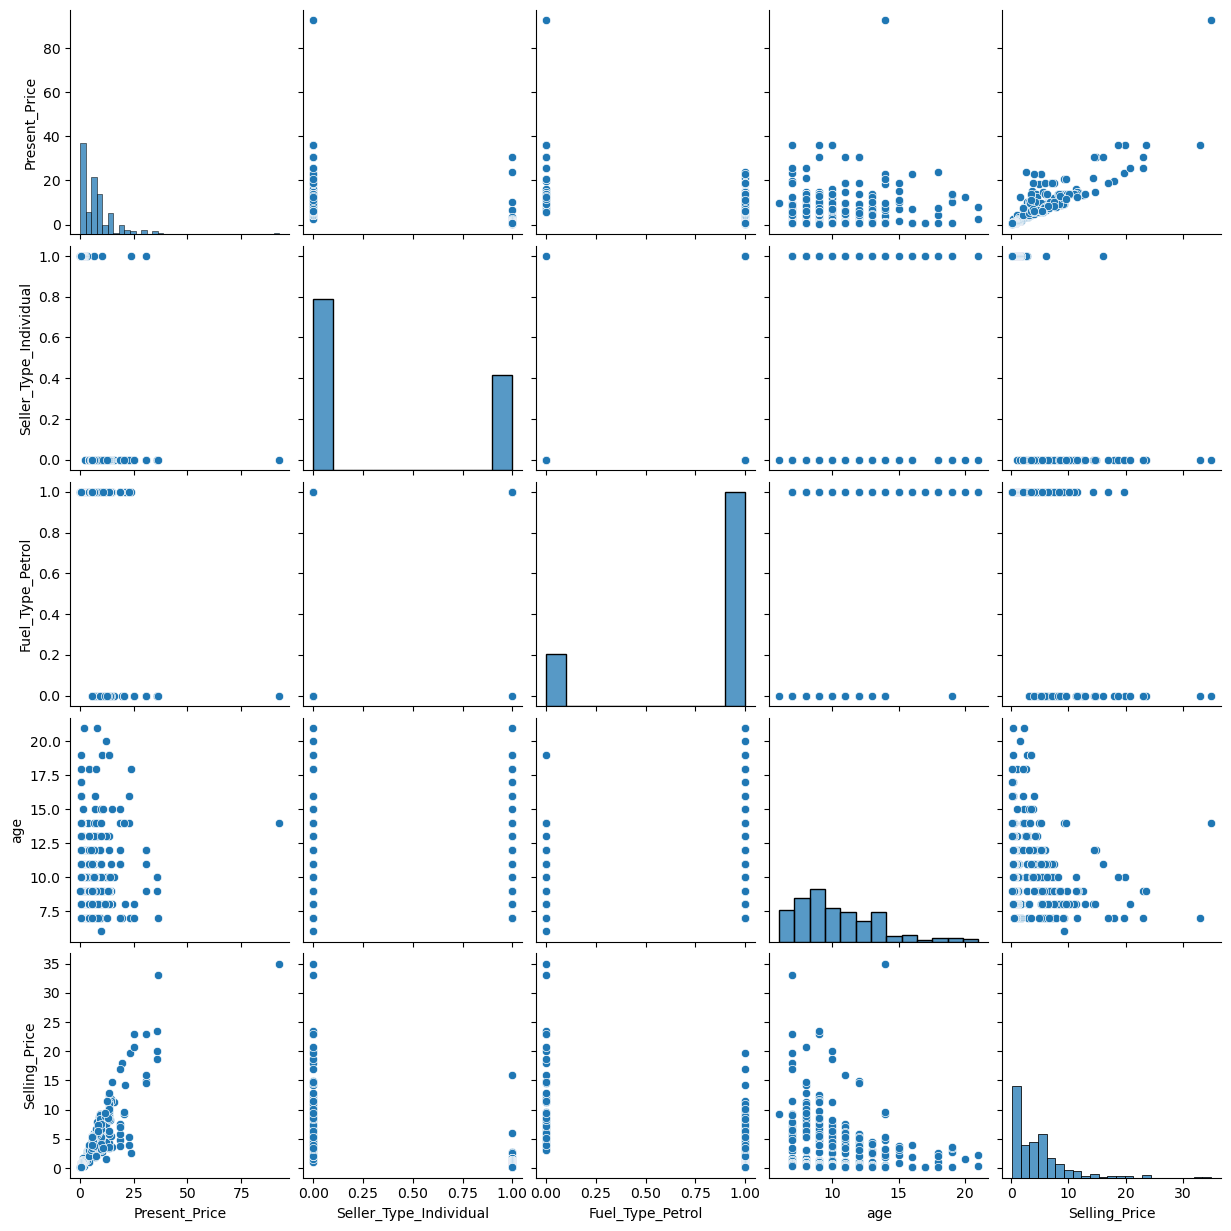

In [40]:
sns.pairplot(cleaned_data)

In [41]:
cleaned_data.duplicated().sum()

4

In [42]:
cleaned_data.drop_duplicates(inplace=True)

In [43]:
cleaned_data.duplicated().sum()

0

In [44]:
cleaned_data.to_csv("cleaned_dataset.csv")

## Model Building

In [80]:
# Access the Cleaned_data
df = pd.read_csv("cleaned_dataset.csv")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              293 non-null    int64  
 1   Present_Price           293 non-null    float64
 2   Seller_Type_Individual  293 non-null    int64  
 3   Fuel_Type_Petrol        293 non-null    int64  
 4   age                     293 non-null    int64  
 5   Selling_Price           293 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 13.9 KB


In [82]:
df.drop("Unnamed: 0" ,axis=1,inplace=True)

In [83]:
# split the data
X = df.drop("Selling_Price",axis=1)
Y=df.Selling_Price

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
X  = pd.DataFrame(scaled_df,columns=X.columns)

In [85]:
X.head()

,Present_Price,Seller_Type_Individual,Fuel_Type_Petrol,age
0,-0.226614,-0.747336,0.491452,-0.133691
1,0.231527,-0.747336,-2.034785,0.209918
2,0.267482,-0.747336,0.491452,-1.164516
3,-0.393633,-0.747336,0.491452,0.897135
4,-0.078153,-0.747336,-2.034785,-0.133691


In [86]:
# Train and test data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=7)

In [88]:
import keras

In [87]:
from keras.models import Sequential
from keras.layers import Dense,ReLU,Dropout

In [89]:
# Regression model building
model = Sequential()
model.add(Dense(units =4,kernel_initializer="he_uniform",activation="relu",input_dim=4))
model.add(Dense(units=20,kernel_initializer = "he_uniform",activation="relu"))
model.add(Dense(units=10,kernel_initializer = "he_uniform",activation= "relu"))
model.add(Dense(units=1,kernel_initializer="he_uniform"))
model.compile(
    optimizer="adam",loss="mae",metrics=["mae"])

In [90]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 341 (1.33 KB)

 Trainable params: 341 (1.33 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.fit(train_x,train_y,validation_split=0.2,batch_size=10,epochs=30)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.6669 - mae: 4.6669 - val_loss: 3.8784 - val_mae: 3.8784
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2565 - mae: 4.2565 - val_loss: 3.4527 - val_mae: 3.4527
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7756 - mae: 3.7756 - val_loss: 3.1936 - val_mae: 3.1936
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9910 - mae: 3.9910 - val_loss: 2.8897 - val_mae: 2.8897
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9122 - mae: 3.9122 - val_loss: 2.5580 - val_mae: 2.5580
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1506 - mae: 3.1506 - val_loss: 2.2331 - val_mae: 2.2331
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1071 - mae: 3.1071 - val_loss: 1.8791 - val_mae: 1.8791
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1618 - mae: 2.1618 - val_loss: 1.5941 - val_mae: 1.5941
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7440 - mae:

In [57]:
from sklearn.metrics import r2_score
print(r2_score(train_y,model.predict(train_x)))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.9252257629764867


In [58]:
print(r2_score(test_y,model.predict(test_x)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.8981820615145918


In [97]:
from keras_tuner import RandomSearch

In [110]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int("num_layers",1,5)):
        model.add(Dense(units=hp.Int(f"units_{i}",8,128,step=8),
                        activation="relu",
                        kernel_initializer = "he_uniform"))
        model.add(Dropout(hp.Float(f"dropout_{i}",0.1,0.5,step=0.1)))
    model.add(Dense(units=1,kernel_initializer="he_uniform"))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",[1e-1,1e-2,1e-3,1e-4])),
                  loss="mean_squared_error",
                  metrics=["mae"])
    return model
    

In [111]:
tuner = RandomSearch(
    build_model,
    objective="mae",
    max_trials=10,
    executions_per_trial =3,
    directory="tuner_weights",
    project_name = "car_price_prediction"
)

In [112]:
tuner.search(train_x,train_y,epochs=100,validation_split=0.2,batch_size=10)

Trial 10 Complete [00h 01m 19s]
mae: 0.6854846080144247

Best mae So Far: 0.6854846080144247
Total elapsed time: 00h 12m 51s


In [113]:
best_model=tuner.get_best_models(num_models=1)[0]

In [114]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 72)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 104)                 │           7,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 104)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 88)                  │           9,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              89 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,281 (67.50 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
print(r2_score(train_y,best_model.predict(train_x)))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0.9153647319682985


In [116]:
print(r2_score(test_y,best_model.predict(test_x)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.9072674460861823


In [118]:
best_model.fit(X,Y)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.5628 - mae: 0.7661


In [119]:
print(r2_score(train_y,best_model.predict(train_x)))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.932086593012912


In [120]:
print(r2_score(test_y,best_model.predict(test_x)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.9335409703136577


In [121]:
best_model.save("model.h5")

In [122]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [123]:
# Sample Prediction
from keras.models import load_model

In [125]:
model = load_model("model.h5")

In [126]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 72)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 104)                 │           7,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 104)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 88)                  │           9,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 88)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              89 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,283 (67.52 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [127]:
year = 2022
present_Price = 10
Fuel_Type = "Diesel"
Seller_Type = "Individual"
fuel = 1 if Fuel_Type == "Petrol" else 0
seller = 1 if Seller_Type == "Individual" else 0
age = 2024 -year


In [128]:
input = {
    "Present_Price":[present_Price],
    "Seller_Type_Individual":[seller],
    "Fuel_Type_Petrol":[fuel],
    "age":[age]
}
data = pd.DataFrame(input)
scaler_1 = joblib.load("scaler.pkl")
scaled = scaler_1.transform(data)
data_input = pd.DataFrame(scaled,columns=data.columns)


In [129]:
best_model.predict(data_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[8.700082]], dtype=float32)